# Paul trap simulation

#### Sebastian Löfgren
#### Ricardo Méndez-Fragoso
#### Jonas Enger

Explanation text

Welcome 😀 

Enter the initial values for x and y


	 x =  40
	 y =  12


I have the solution for the entered values


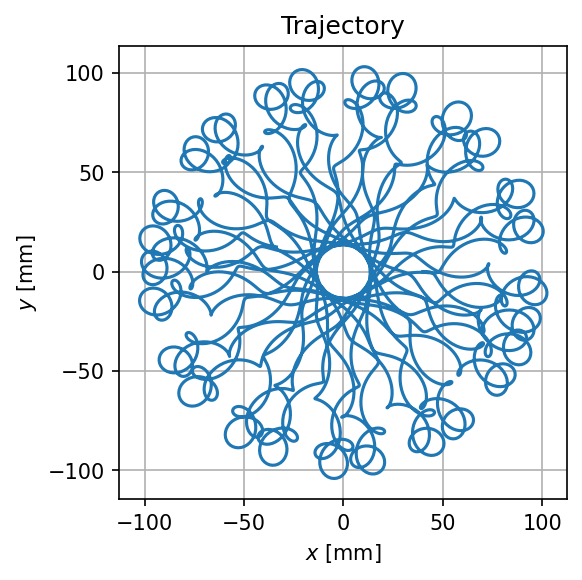

In [2]:
%run Saddle_Trap_Lib.ipynb